# T-Test

## A. Readmission Issue

### A1. Question

Are patients' hospital days ("Initial_days") and/or average daily charge ("TotalCharge") correlated with their readmission ("ReAdmis") status?

### A2. Stakeholder Benefit

Stakeholders could benefit from identification of the patients at highest risk for readmission. If a patient is determined to fall into one of these potential indicator categories, healthcare providers could monitor these patients more closely while in the hospital, provide additional patient education, provide additional post-discharge services and more closely monitor the patient post-discharge to prevent a costly readmission. 

### A3. Relevant Data

The most relevant data will be the dependent variable, readmission ("ReAdmis"), and the variables "TotalCharge" and hospital days ("Initial_days"). As a binary categorical variable, the two possible values for thd readmission column are either "Yes" or "No." The "TotalCharge" and "Initial_days" variables are continuous quantitative variables.

## B. Data Analysis

### B1. T-Test

In [1]:
!pip install plotnine
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline
import plotnine as p9
print("Done.")

Done.


In [2]:
medical=pd.read_csv('Desktop/WGU/D207/medical_clean.csv')
print("Imported.")

Imported.


In [3]:
pd.set_option('display.max_columns', 60)
print("Display size adjusted.")

Display size adjusted.


In [4]:
medical.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
Readmit_days=medical[medical.ReAdmis=="Yes"].Initial_days
Not_Readmit_days=medical[medical.ReAdmis=="No"].Initial_days
t_result_days=stats.ttest_ind(Readmit_days, Not_Readmit_days)
print(t_result_days)

Ttest_indResult(statistic=161.9324105776643, pvalue=0.0)


In [6]:
Readmit_charge=medical[medical.ReAdmis=="Yes"].TotalCharge
Not_Readmit_charges=medical[medical.ReAdmis=="No"].TotalCharge
t_result_charge=stats.ttest_ind(Readmit_charge, Not_Readmit_charges)
print(t_result_charge)

Ttest_indResult(statistic=157.16875359158408, pvalue=0.0)


In [7]:
alpha=0.05
if (t_result_days[1] < alpha):
    print("Number of Hospital Days correlated to Readmission")
else:
    print("No significance")

Number of Hospital Days correlated to Readmission


In [8]:
alpha=0.05
if (t_result_charge[1] < alpha):
    print("Average Daily Charge correlated to Readmission")
else:
    print("No significance")

Average Daily Charge correlated to Readmission


### B2. Output of T-Test

<i> please see above

### B3. Justification of Use of T-Test

Since the two analyses being performed were between hospital days ("Initial_days"), a continuous variable, and readmission ("ReAdmis"), a categorical variable, and "TotalCharge", a continuous variable, and "ReAdmis", a t-test was selected to perform the analysis (Kumar, 2020). 

## C. Distribution of Variables Using Univariate Statistics

#### Continuous Variables

In [9]:
medical.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

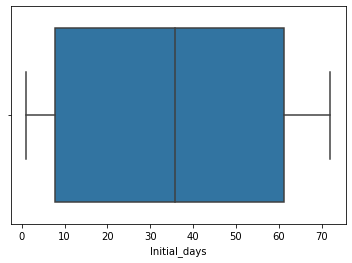

In [10]:
boxplot=sns.boxplot(x='Initial_days',data=medical)

<AxesSubplot:>

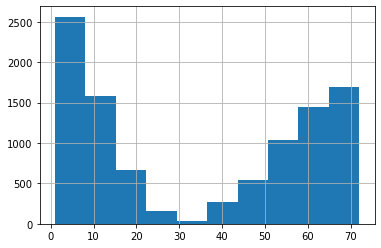

In [11]:
medical.Initial_days.hist()

The "Initial_Days" variable has a bimodal distribution.

In [12]:
medical.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

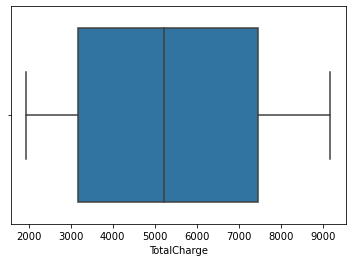

In [13]:
boxplot=sns.boxplot(x='TotalCharge',data=medical)

<AxesSubplot:>

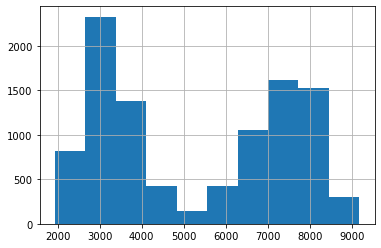

In [14]:
medical.TotalCharge.hist()

The "TotalCharge" variable has a bimodal distribution.

#### Categorical Variables

In [15]:
medical.Stroke.value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

<AxesSubplot:xlabel='Stroke'>

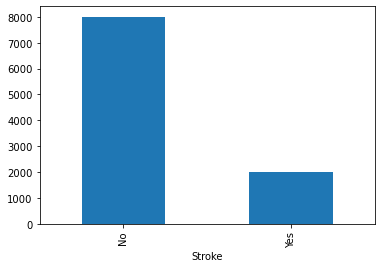

In [16]:
medical.groupby('Stroke').size().plot.bar()

There is a skewed distribution among the Stroke variable. Most of the patients do not have a history of stroke.

In [17]:
medical.ReAdmis.value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

<AxesSubplot:xlabel='ReAdmis'>

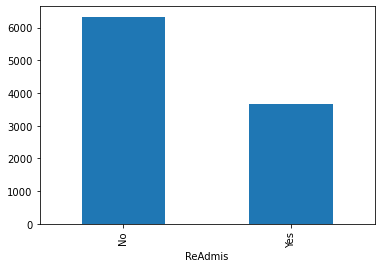

In [18]:
medical.groupby('ReAdmis').size().plot.bar()

There is a skewed distribution among the "ReAdmis" variable. Most of the patients were not readmitted.

## D. Distribution of Variables Using Bivariate Statistics

#### Continuous Variables

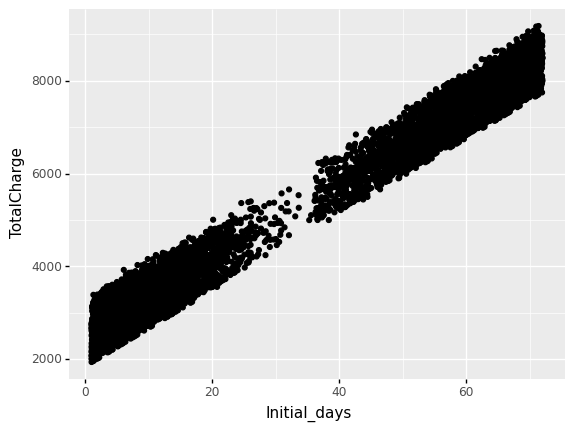

In [19]:
print(p9.ggplot(medical)+ p9.aes(x="Initial_days",y="TotalCharge")+ p9.geom_point())

In [20]:
pearson=stats.pearsonr(medical.Initial_days, medical.TotalCharge)
print(pearson)

(0.9876402655398173, 0.0)


<function matplotlib.pyplot.show(close=None, block=None)>

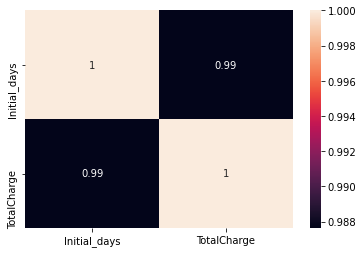

In [21]:
medical_biv=medical[['Initial_days','TotalCharge']]
sns.heatmap(medical_biv.corr(), annot=True)
plt.show

#### Categorical Variables

Stacked Bar Chart

<AxesSubplot:xlabel='Stroke'>

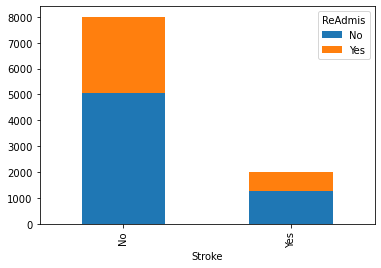

In [22]:
tbl=pd.pivot_table(medical.groupby(["Stroke","ReAdmis"]).size().reset_index(), values=0, index="Stroke", columns=["ReAdmis"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Complication_risk'>

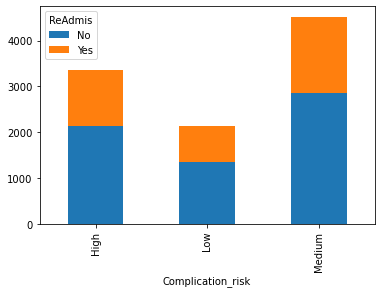

In [23]:
tbl=pd.pivot_table(medical.groupby(["Complication_risk","ReAdmis"]).size().reset_index(), values=0, index="Complication_risk", columns=["ReAdmis"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Initial_admin'>

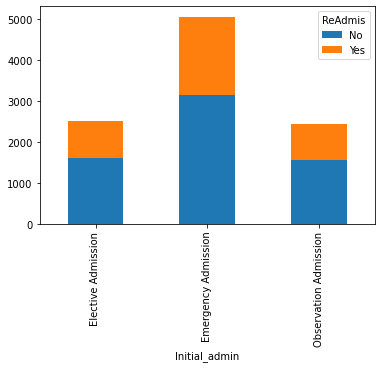

In [24]:
tbl=pd.pivot_table(medical.groupby(["Initial_admin","ReAdmis"]).size().reset_index(), values=0, index="Initial_admin", columns=["ReAdmis"],aggfunc=np.sum)
tbl.plot(kind='bar', stacked=True)

## E. Data Analysis Implications

### E1. Hypothesis Test Results

Using an alpha of 0.05, and the t-test yielding a p-value of 0.0, for both the "Initial_Days" and "TotalCharge" variables, we can reject the null hypothesis, and conclude that they are both correlated to readmission ("ReAdmis") (Bruce, 2020).  

### E2. Limitations of Data Analysis

The t-test may not be reliable if the data violates the t-test assumptions. The assumptions for the t-test include that the data is continuous, the data was collected using random sampling, the data is normally distributed and that the two populations have the same variance (JMP Statistical Discovery, 2022). While the data is continuous, the data had a bimodal distribution, not a normal distribution, therefore creating a limitation on the results of the data analysis.

### E3. Recommended Course of Action

With a very high correlation between hospital days("Initial_days") and readmission ("ReAdmis"), and average daily charge ("TotalCharge") and readmission, there is an opportunity for the hospital system to provide a targeted approach to avoid costly readmissions. By focusing on the patients who have extended or prolonged hospital stays and patients who have an elevated average daily charge, administration can provide the extra care, education and communication with these patients. It makes sense that the patients who are being readmitted at a later date are mostly those with complex medical issues that are both very costly and require long and extended hospital stays.

### Code References

Costa, J. F. (2020, October 22). *Create a grouped bar chart with Matplotlib and pandas*. Medium. https://medium.com/analytics-vidhya/create-a-grouped-bar-chart-with-matplotlib-and-pandas-9b021c97e0a 

### Additional Sources

Bruce, P.A. (2020). *Practical Statistics for Data Scientists, 50 Essential Concepts Using R and Python.* Sebastopol, CA: O'Reilly Media, Incorporated

Kumar, S. (2021, March 15). *How to know which Statistical Test to use for Hypothesis Testing.* Toward Data Science.  https://towardsdatascience.com/how-to-know-which-statistical-test-to-use-for-hypothesis-testing-744c91685a5d


JMP Statistical Discovery. (2022). *Two-Sample t-Test*. https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/two-sample-t-test.html